<a href="https://colab.research.google.com/github/JenioDwiSetyoFavianGian/MACHINE-LEARNING-2023/blob/main/Quiz2_JenioDwiSetyoFavianGian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama : Arsyanda Irza Rabbani Yuardhino
### Kelas : TI - 3F
### NIM : 2141720245

In [38]:
import tensorflow as tf # import tensorflow pustaka yg digunakan dalam ML dan AI
import numpy as np # import numpy untuk komputasi numerik
import pandas as pd # import pandas untuk manipulasi dan menganalisis data
import matplotlib.pyplot as plt # import matplotlib untuk membuat visualisasi data
import seaborn as sns # import seaborn untuk menyediakan antarmuka yg lebih mudah digunakan
from sklearn.preprocessing import LabelBinarizer # import kelas LabelBinarizer untuk mengubah variabel kategori menjadi representasi biner
from sklearn.model_selection import train_test_split # import fungsi train_test_split untuk membagi dataset menjadi subset pelatihan dan subset pengujian
from sklearn.metrics import classification_report # import fungsi classification_report untuk menghasilkan laporan klasifikasi yang mencakup metrik evaluasi
import zipfile # import modul zipfile untuk bekerja dengan file ZIP dalam python

#Load Dataset

#Load MNIST

In [39]:
# import dataset mnist yg berisi gambar, angka dan tulisan tangan untuk pengujian
from tensorflow.keras.datasets import mnist

In [40]:
# memuat data pelatihan dan pengujian dari dataset mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [41]:
# Check shape data
#train_data.shape -> informasi ukuran data pelatihan
#test_data.shape -> informasi ukuran data pelatihan
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [42]:
# Check shape labels
#train_labels.shape-> ukuran label pelatihan
#test_labels.shape-> ukuran label pengujian
(train_labels.shape, test_labels.shape)


((60000,), (10000,))

In [43]:
# Check each data shape --> should be 28*28
# cek bentuk data gambar pertama (indeks ke-0)
train_data[0].shape


(28, 28)

In [44]:
# Check the label
# cek ukuran label pelatihan
train_labels.shape

(60000,)

#Combine Train and Test Data

In [45]:
digits_data = np.vstack([train_data, test_data]) # menggabungkan train_data dan test_data secara vertikal
digits_labels = np.hstack([train_labels, test_labels]) # menggabungkan train_labels dan test_labels secara horizontal


In [46]:
# Check data shape
# cek ukuran data (digits_data) setelah dilakukan penggabungan
digits_data.shape

(70000, 28, 28)

In [47]:
# Check label shape
# cek ukuran data label (digits_label) setelah dilakukan penggabungan
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 4')

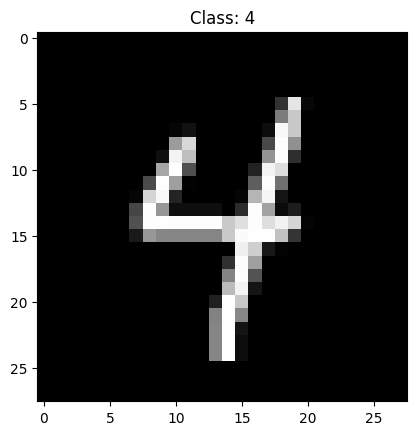

In [48]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0]) # menghasilkan sebuah bilangan bulat acak antara 0 dan digits_data.shape[0]. digits_data.shape[0] memberikan jumlah total sampel dalam dataset digits_data. Variabel idx akan menyimpan indeks acak ini.
plt.imshow(digits_data[idx], cmap='gray') # untuk menampilkan gambar yang dipilih secara acak
plt.title('Class: ' + str(digits_labels[idx])) # untuk menampilkan judul pada plot.


<Axes: xlabel='Labels', ylabel='count'>

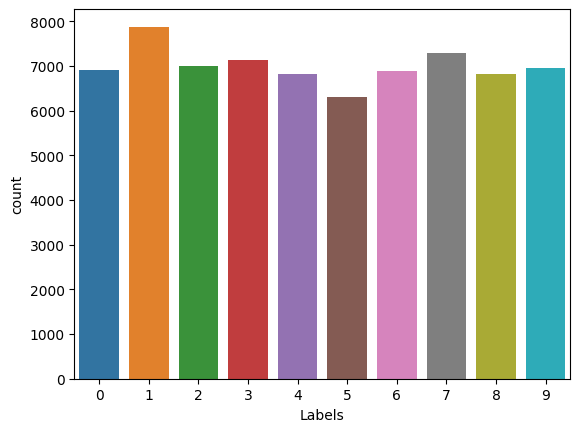

In [49]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels']) # untuk mengakses dan memanipulasi data label kelas menggunakan fitur-fitur pandas.
sns.countplot(df_labels, x='Labels') # untuk membuat diagram batang

#Load Kaggle A-Z

In [50]:
# download zip file
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-04 12:41:10--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip.2’

alfabeto_A-Z.zip.2  100%[===================>] 184.67M   178MB/s    in 1.0s    

2023-12-04 12:41:11 (178 MB/s) - ‘alfabeto_A-Z.zip.2’ saved [193643888/193643888]



In [51]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r') # membuat objek dan menentukan nama file arsip zip yang diekstrak. mode='r' menunjukkan bahwa arsip tersebut dalam mode hanya baca
zip_object.extractall('./') # untuk mengekstrak semua file dari arsip ZIP ke direktori saat ini. Argumen ./ menunjukkan bahwa file-file akan diekstrak ke direktori tempat kode ini dijalankan.
zip_object.close() #  menutup objek zip_object setelah selesai mengekstrak file-file dari arsip ZIP


In [52]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32') # menggunakan fungsi read_csv dari pustaka pandas untuk membaca file CSV dan mengubah tipe data dalma dataset_az menjadi 'float32'
dataset_az # menampilkan dataset

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Get pixel data only
# memisahkan data piksel, hapus kolom '0' yang merupakan label
alphabet_data = dataset_az.drop('0', axis=1)

# Get labels only
# memisahkan label, amnil kolom '0'
alphabet_labels = dataset_az['0']

In [54]:
# Check shape data
# cek kembali bentuk /jumlah data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [55]:
# Check shape labels
# cek bentuk label
alphabet_labels.shape

(372450,)

In [56]:
# Reshape pixel data to 28*28
#Ubah pixel gambar jadi 28*28 2dimensi
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))

# Check the result by its shape
#cek kembali stelah perubahan ukuran pixel
alphabet_data.shape

(372450, 28, 28)

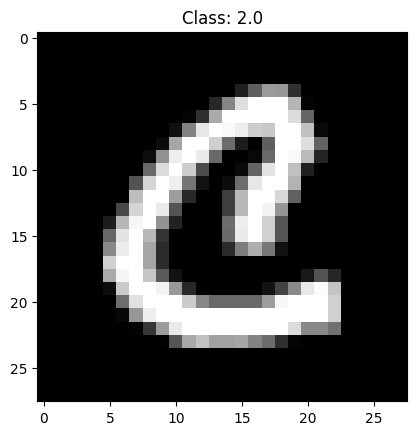

In [57]:
# Randomly checking A-Z dataset
# buat indeks acak
index = np.random.randint(0, alphabet_data.shape[0])

# menampilkan gambar yang sudah dicek acak
plt.imshow(alphabet_data[index], cmap = 'gray')

# menampilkan judul dengan nama label
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='Labels', ylabel='count'>

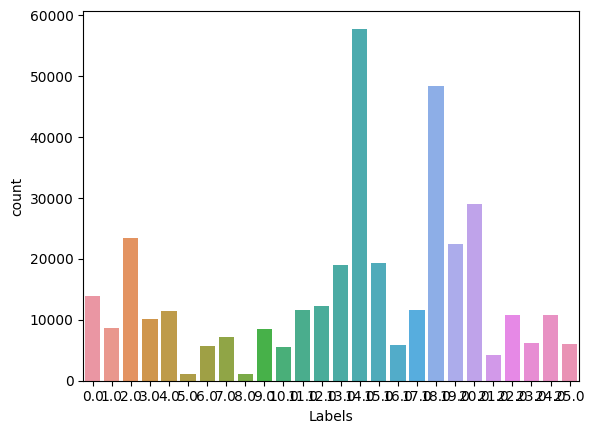

In [58]:
# Check data distribution

# memebuat dataframe baru dari label dataset A-Z
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})

# membuat counplot untuk menunjukkan sebaran jumlah setiap karakter dataset
sns.countplot(df_az_labels, x='Labels')

#Combine Dataset (MNIST + Kaggel A-Z)

In [59]:
# Check unique value from digits_labels
# get nilai unik dari array dari digits-label
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [60]:
# Check unique value from alphabet_labels
# get nilai unik dari array alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [61]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

#buat label karakterA-Z dimulai dari nilai 10-35 agar bisa melanjutkan label digit
alphabet_labels += 10

In [62]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [63]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data]) # menggabungkan data A-Z

labels = np.hstack([alphabet_labels, digits_labels]) # #menggabungkan label A-Z

In [64]:
# Check the shape
data.shape, labels.shape # cek bentuk ukuran data kemabli

((442450, 28, 28), (442450,))

In [65]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [66]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [67]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1) # menambahkan dimensi baru karen memebutuhkan data 3D

# check shape
data.shape

(442450, 28, 28, 1)

#Preprocessing

In [68]:
# Normalize data
data /= 255.0 # #bagi data dengan 255 untuk konversi nilai pixel menjadi rentang 0-10

In [69]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

Normalisasi berhasil, rentang pixel saat ini sudah antara 0 dan 1

In [70]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer() # konfersi label kelas menjadi biner
labels = le.fit_transform(labels)

In [71]:
# Check labels shape
labels.shape

(442450, 36)

Terdapat 442450 sampel dan direpresentasikan deng panjang vektor 36. (26 untuk karakter A-Z, 10 Kelas untuk digit 0-9)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

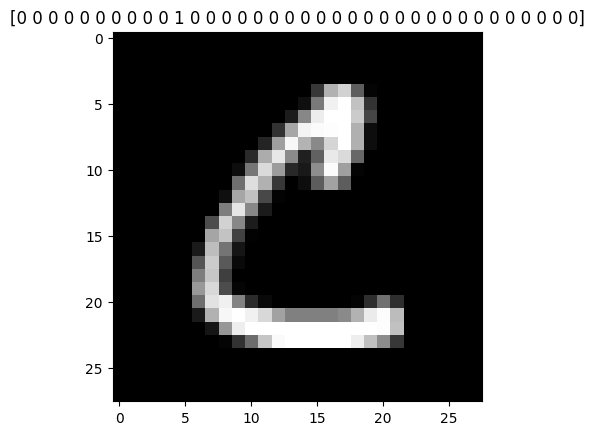

In [72]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray') # menampilkan gamabr dari indeks 30000
plt.title(str(labels[0])) # memberi judul

In [73]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0) # cek total jumlah masing2 kelas dalam dataset
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [74]:
# Check the biggest value of data
classes_total.max() # cek data terbesar

57825

In [75]:
# Create a weight for each data
classes_weights = {}#inisialisasi
for i in range(0, len(classes_total)):#iterasi tiap kelas
  #print(i)
  # invers proporsional dengan jumlah sampel pada kelas tersebut,
  # sehingga kelas dengan lebih sedikit sampel mendapatkan bobot yang lebih tinggi.
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

#Split Data to Train and Test

In [76]:
# pisah dataset jadi 20 (uji):80 (pelatihan)
# Argumen stratify digunakan untuk memastikan proporsi kelas yang seimbang di kedua subset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

#Create Data Augmentation

In [77]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator # untuk menghasilkan variasi gambar dari dataset asli

In [78]:
# membuat ibjek image datagenerator
augmentation = ImageDataGenerator(rotation_range = 10, # rentang rotasi gambar
                                  zoom_range=0.05,  # rentang zoom
                                  width_shift_range=0.1, # rentang pergeseran lebar gambr
                                  height_shift_range=0.1, # rentang pergeseran tinggi gambar
                                  horizontal_flip = False) # pemutaran horizontal gambar

#Build CNN Model

In [79]:
# Import library
from tensorflow.keras.models import Sequential # membuat model sequential, terdiri dari bbrpa layers

 # lapisan convolusi untuk proses gambar
 # MaxPool2D untuk pengurangan dimensi
 # Flatten untuk meratakan output jadi satu dimensi
 # dense: lapisan neurak network
 # modelcheck point: callback, simpan model selama pelatihan
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint #

In [80]:
# Build the network
# Membuat objek Sequential untuk membangun model secara berurutan
network = Sequential()

# Menambahkan lapisan konvolusi pertama
network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

# Menambahkan lapisan pooling untuk mereduksi dimensi
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan lapisan konvolusi kedua
network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))

# Menambahkan lapisan pooling kembali
network.add(MaxPool2D(pool_size=(2,2)))

# Menambahkan lapisan konvolusi ketiga
network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))

# Menambahkan lapisan pooling kembali
network.add(MaxPool2D(pool_size=(2,2)))

# Meratakan output menjadi vektor satu dimensi
network.add(Flatten())

# Menambahkan lapisan Dense (fully connected)
network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

# Menambahkan lapisan output dengan fungsi aktivasi softmax
network.add(Dense(36, activation='softmax'))

# Mengompilasi model dengan fungsi kerugian, pengoptimal, dan metrik yang diinginkan
network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [81]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [82]:
# Create actual labels
# Membuat daftar label yang sesuai dengan kelas-kelas dalam dataset
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


#Train model

In [83]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model' # nama file
epochs = 20
batch_size = 128

In [84]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [85]:
# Fit the model
# latih model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),# Generator augmented data
                      validation_data = (X_test, y_test),# Data validasi
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs, # Jumlah batch per epoch
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])# Menggunakan ModelCheckpoint untuk menyimpan model terbaik

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.2140 - accuracy: 0.8251
Epoch 1: val_loss improved from inf to 0.32206, saving model to custom_ocr.model
2765/2765 [==============================] - 290s 104ms/step - loss: 2.2140 - accuracy: 0.8251 - val_loss: 0.3221 - val_accuracy: 0.8679
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9714 - accuracy: 0.9018
Epoch 2: val_loss improved from 0.32206 to 0.21063, saving model to custom_ocr.model
2765/2765 [==============================] - 311s 113ms/step - loss: 0.9714 - accuracy: 0.9018 - val_loss: 0.2106 - val_accuracy: 0.9149
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8038 - accuracy: 0.9138
Epoch 3: val_loss improved from 0.21063 to 0.20585, saving model to custom_ocr.model
2765/2765 [==============================] - 297s 107ms/step - loss: 0.8038 - accuracy: 0.9138 - val_loss: 0.2059 - val_accuracy: 0.9138
Epoch 4/20
2765/2765 [======================

Dari proses pelatuhan dengan 20 epoch, maka dapat dilhat bahwa nilai kurasi data tiap iterasi makin naik

#Evaluate Model

#Make a Single Prediction

In [86]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size) # Membuat prediksi menggunakan model pada dataset pengujian

692/692 [==============================] - 16s 23ms/step


In [87]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

array([1.4139840e-16, 2.0981264e-10, 1.2127880e-11, 4.9518867e-15,
       4.1917775e-20, 8.7913075e-13, 1.2768281e-17, 6.5947530e-17,
       1.1744602e-13, 1.3165804e-17, 1.3616974e-19, 4.7425844e-12,
       4.8537645e-12, 8.2180779e-10, 7.4205978e-16, 8.5152942e-15,
       3.6207318e-10, 1.4409904e-19, 9.9999148e-01, 8.3858504e-06,
       2.6404282e-14, 5.4060121e-09, 4.0845680e-19, 9.4561424e-16,
       1.2537549e-13, 2.0094804e-13, 1.9776826e-15, 7.3709998e-16,
       2.9508071e-10, 7.1571904e-08, 2.9492075e-11, 1.8281707e-16,
       1.3931370e-21, 5.8987962e-16, 6.8909399e-11, 4.9070142e-10],
      dtype=float32)

In [88]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1]) # mengembalikan indeks kelas dengan nilai probabilitas tertinggi

18

In [89]:
# Check label for 24
name_labels[18] # cek label indeks 18

'I'

In [90]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [91]:
# check the highest value
np.argmax(y_test[1])

18

In [92]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

#Make an Evaluation on Test Data

In [93]:
# Evaluate on test data
network.evaluate(X_test, y_test) # # Mengevaluasi model pada dataset pengujian

2766/2766 [==============================] - 22s 8ms/step - loss: 0.1379 - accuracy: 0.9499


[0.13791979849338531, 0.9499039649963379]

In [94]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.31      0.70      0.43      1381
           1       0.97      0.99      0.98      1575
           2       0.94      0.95      0.95      1398
           3       0.98      0.99      0.98      1428
           4       0.92      0.96      0.94      1365
           5       0.78      0.92      0.85      1263
           6       0.97      0.96      0.97      1375
           7       0.97      0.99      0.98      1459
           8       0.95      0.99      0.97      1365
           9       0.95      0.99      0.97      1392
           A       0.99      0.99      0.99      2774
           B       0.98      0.98      0.98      1734
           C       0.98      0.99      0.99      4682
           D       0.94      0.96      0.95      2027
           E       0.98      0.99      0.99      2288
           F       0.91      1.00      0.95       233
           G       0.96      0.96      0.96      1152
           H       0.96    

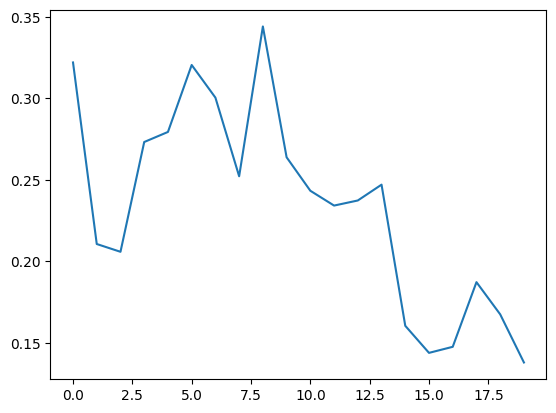

In [95]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss']) # Membuat plot nilai fungsi kerugian pada data validasi

Dari grafik tersebut dapat dilihat bahwa nilai fungsi kerugian pada data validasi lebih kecil dari pada akhir pelatihan dibandingkan awal, yang dapat diartikan bahwa model berhasil belajar dan menuingkatkan kinerjanya.

In [96]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

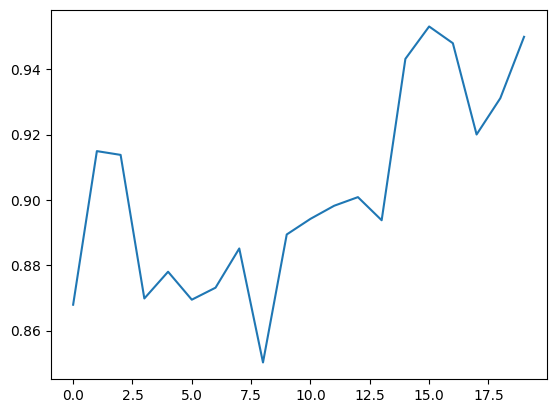

In [97]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

Dari grafik tersebut menunjukkan bahwa akurasi meningkat seiring waktu,dan menunjukkan model berhasil belajar dan meningkatkan kinerjanya pada data validasi.

#Save The Model

In [98]:
# The result will show in colab directory
network.save('network', save_format= 'h5') # menyimpan seluruh model kedalam sebuah file

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Testing on Real Image

In [99]:
# Import library
from tensorflow.keras.models import load_model

In [100]:
# Load saved network
load_network = load_model('network')

In [101]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

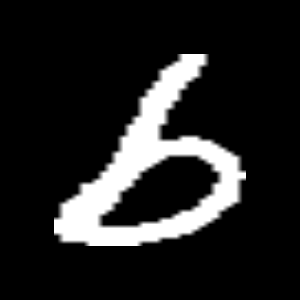

In [103]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('b_small.png')
cv2_imshow(img)

In [104]:
# Check shape
img.shape

(300, 300, 3)

In [105]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(300, 300)

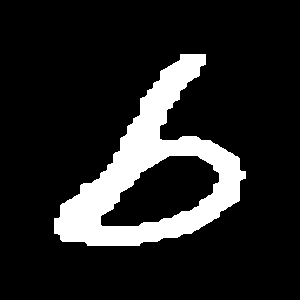

120.0


In [106]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [107]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [108]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

In [109]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [110]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 82ms/step


6

In [111]:
# check label for 6
name_labels[6]

'6'

#KESIMPULAN

Program di atas adalah implementasi pengolahan data dan pembuatan model Convolutional Neural Network (CNN) dengan menggabungkan dataset MNIST dan Kaggle A-Z. Model CNN dilatih menggunakan data tersebut, dievaluasi, dan disimpan untuk penggunaan selanjutnya. Hasilnya diuji menggunakan gambar di luar dataset.

Selanjutnya, model CNN digunakan untuk memprediksi nilai dari gambar "b_small.jpg", dan hasilnya adalah nilai prediksi 6, sesuai dengan label ke-6 dalam daftar name_labels, yang merupakan huruf G. Kesimpulannya, model CNN berhasil memprediksi dengan benar huruf pada gambar yang tidak termasuk dalam dataset pelatihan.